## Enter input file names here

In [1]:
from os import path #To deal with file locations
# directory = u'/Users/chris/Documents/00Research/00Data/CLR_2N/'
# #unmodified Topas export (i.e. two header rows and commas separating the values)
#TODO use one of those header rows to name the columns of the data frame.
#ENTER INFO HERE 
dataFolder = u'/Users/chris/Documents/00Research/00Data/DataProcessing/TM_nitrides/'
dataFiles = ['CLR_2N_035A_fit_20181205_Mg3N2_SnI4_200C_14days_10_60_10minScan with_hkls 10_60_2Theta.txt',
             'CLR_2N_151C_fit_20190303_Mg3N2_SnI4_65minRamp_200C_10d_Nijimasu_10_60_20minScan 60Mg3N2 34SnI4 6MgI2.txt',
            'CLR_2N_151B_fit_20190305_Mg3N2_SnI4_12hrRamp_250C_24hr_Magura_10_60_20minScan 78Mg3N2 18SnI4 4MgI2.txt']

#ENTER INFO HERE 
# #Where do you want to save this?
# saveIn = u'/Users/chris/Documents/00Research/00Data/DataProcessing/TM_nitrides/pyGraphs/'
# saveFigAs = "CLR_2N_099_035_2Mg3N2_SnI4.png"


#list for holding hkl file names 
hklFiles = []
#use hkl append to add as many as needed
hklNames = []

#ENTER INFO HERE 
#Where are your tick mark files stored?
hklFolder = '/Users/chris/Documents/00Research/00Data/DataProcessing/TM_nitrides'

#Enter tike mark text file names here. 
#Each file should be a single column of 2 theta values, with a header row.
#The first row get skipped because I like leaving headers in my file
#txt preferable. I don't know if it works with other values.

#ENTER INFO HERE 
#index 0 
hklFiles.append('hklTicks_Mg3N2_10_60.txt')
hklNames.append('Mg$_3$N$_2$')
# #index 1
hklFiles.append('hklTicks_MgI2_10_60.txt')
hklNames.append('MgI$_2$')

hklFiles.append('hklTicks_SnI4_10_60.txt')
hklNames.append('SnI$_4$')

hklFiles.append('hklTicks_Sn_10_60.txt')
hklNames.append('Sn')

hklFiles.append('hklTicks_2N_035A_hklPna21.txt')
hklNames.append('Pna2$_1$')
# #etc
#This adds the names to a list, which later is used to read in data from the named files. 

#OPTIONAL
#tick marks for hkl files will be in these colors. 
#Make sure there are more colors than hkl files
colorlist=['steelblue','crimson','darkcyan', 'darkolivegreen', 'magenta', 'tab:brown']
#For other named colors, see https://matplotlib.org/gallery/color/named_colors.html

# #Sometimes, the tickmark labels get wonky, and I just want to add them in via power point. 
# for i in range(0, len(hklNames)):
#     hklNames[i] = ''

# hklFiles.append('hklTicks_Mg3N2.txt')
# hklNames.append('Mg3N2')
#TODO figure out how to extract an hkl label from the file name 
#(actually, this is less useful if different users have different file naming systems)

#This command allows for zooming, easier saving from jupyter notebooks
%matplotlib notebook

## Enter variables for rapid plot customization

In [2]:
legLoc = 'upper right' #location of the legend in the center box
#legLoc options are as follows:
# ‘best’, ‘upper right', ‘upper left’, ‘lower left’, ‘lower right’
# ‘right’, ‘center left’, ‘center right’, ‘lower center’, ‘upper center’, ‘center’

# #x-axis focus two theta range
# xmin = 10
# xmax = 60

#y-axis range
# ymin = -500
# ymax = 7800

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq
from matplotlib import gridspec
from pylab import * #imports matplotlib (and ???)

#The following 4 lines fail for some reason and I can't figure out why
# matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':"sans-serif"})
matplotlib.rc('text.latex',preamble=r'\usepackage{sfmath}')
# import matplotlib.patches as patches

allSized = 18 #Whatever you want all the text size to be. 
matplotlib.rc('font',   size=     allSized,**{'family':"sans-serif"})     # controls default text sizes
matplotlib.rc('axes',   titlesize=allSized)     # fontsize of the axes title
matplotlib.rc('axes',   labelsize=allSized)    # fontsize of the x and y labels
matplotlib.rc('xtick',  labelsize=allSized)    # fontsize of the tick labels
matplotlib.rc('ytick',  labelsize=allSized)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize= allSized)    # legend fontsize
matplotlib.rc('figure', titlesize=allSized)  # fontsize of the figure title

# # Say, "the default sans-serif font is Helvetica"
# matplotlib.rcParams['font.sans-serif'] = "Helvetica"
# # Then, "ALWAYS use sans-serif fonts"
# matplotlib.rcParams['font.family'] = "sans-serif"

In [3]:
#load in XRD fit data from Topas export
dictionary = {}
for f in dataFiles:
    filePath = path.join(dataFolder,f)
    key = f[0:11]
    dictionary[key] = np.loadtxt(filePath, delimiter=',', dtype = 'float', skiprows = 2, unpack=True)
#     t, data, sigma, diff, fit
#     dictionary[f] = []
#     dictionary[f].append(t)
#     dictionary[f].append(data)
#     dictionary[f].append(sigma)
#     dictionary[f].append(diff)
#     dictionary[f].append(fit)
    print(key)
    print(dictionary[key])
#load hkl ticks into an array
hklTicks = []
for x in hklFiles:
    hklLoc = path.join(hklFolder,x)
    hklTicks.append(np.loadtxt(hklLoc, dtype = 'float', skiprows = 1))

CLR_2N_035A
[[ 1.00001000e+01  1.00358618e+01  1.00716236e+01 ...  5.99235790e+01
   5.99593408e+01  5.99951026e+01]
 [ 2.92900000e+03  2.89900000e+03  3.08100000e+03 ...  3.14000000e+02
   3.23000000e+02  3.03000000e+02]
 [ 4.26662106e+01 -6.67684550e+01  8.53340681e+01 ... -8.85467645e-01
   8.18435538e+00 -1.28660164e+00]
 [ 2.88633379e+03  2.96576845e+03  2.99566593e+03 ...  3.14885468e+02
   3.14815645e+02  3.04286602e+02]]
CLR_2N_151C
[[  10.0001      10.0276877   10.0552754 ...   59.9062089   59.9337966
    59.9613843]
 [4876.        4799.        4692.        ...  418.         481.
   447.       ]
 [ 179.480841    10.3019179 -135.769715  ...  -56.7829406   24.7216262
    26.9948658]
 [4696.51916   4788.69808   4827.76972   ...  474.782941   456.278374
   420.005134 ]]
CLR_2N_151B
[[  10.0001       10.0276877    10.0552754  ...   59.9062089
    59.9337966    59.9613843 ]
 [4797.         4897.         4886.         ...  477.
   472.          485.        ]
 [  50.4461437    24.9236

<IPython.core.display.Javascript object>


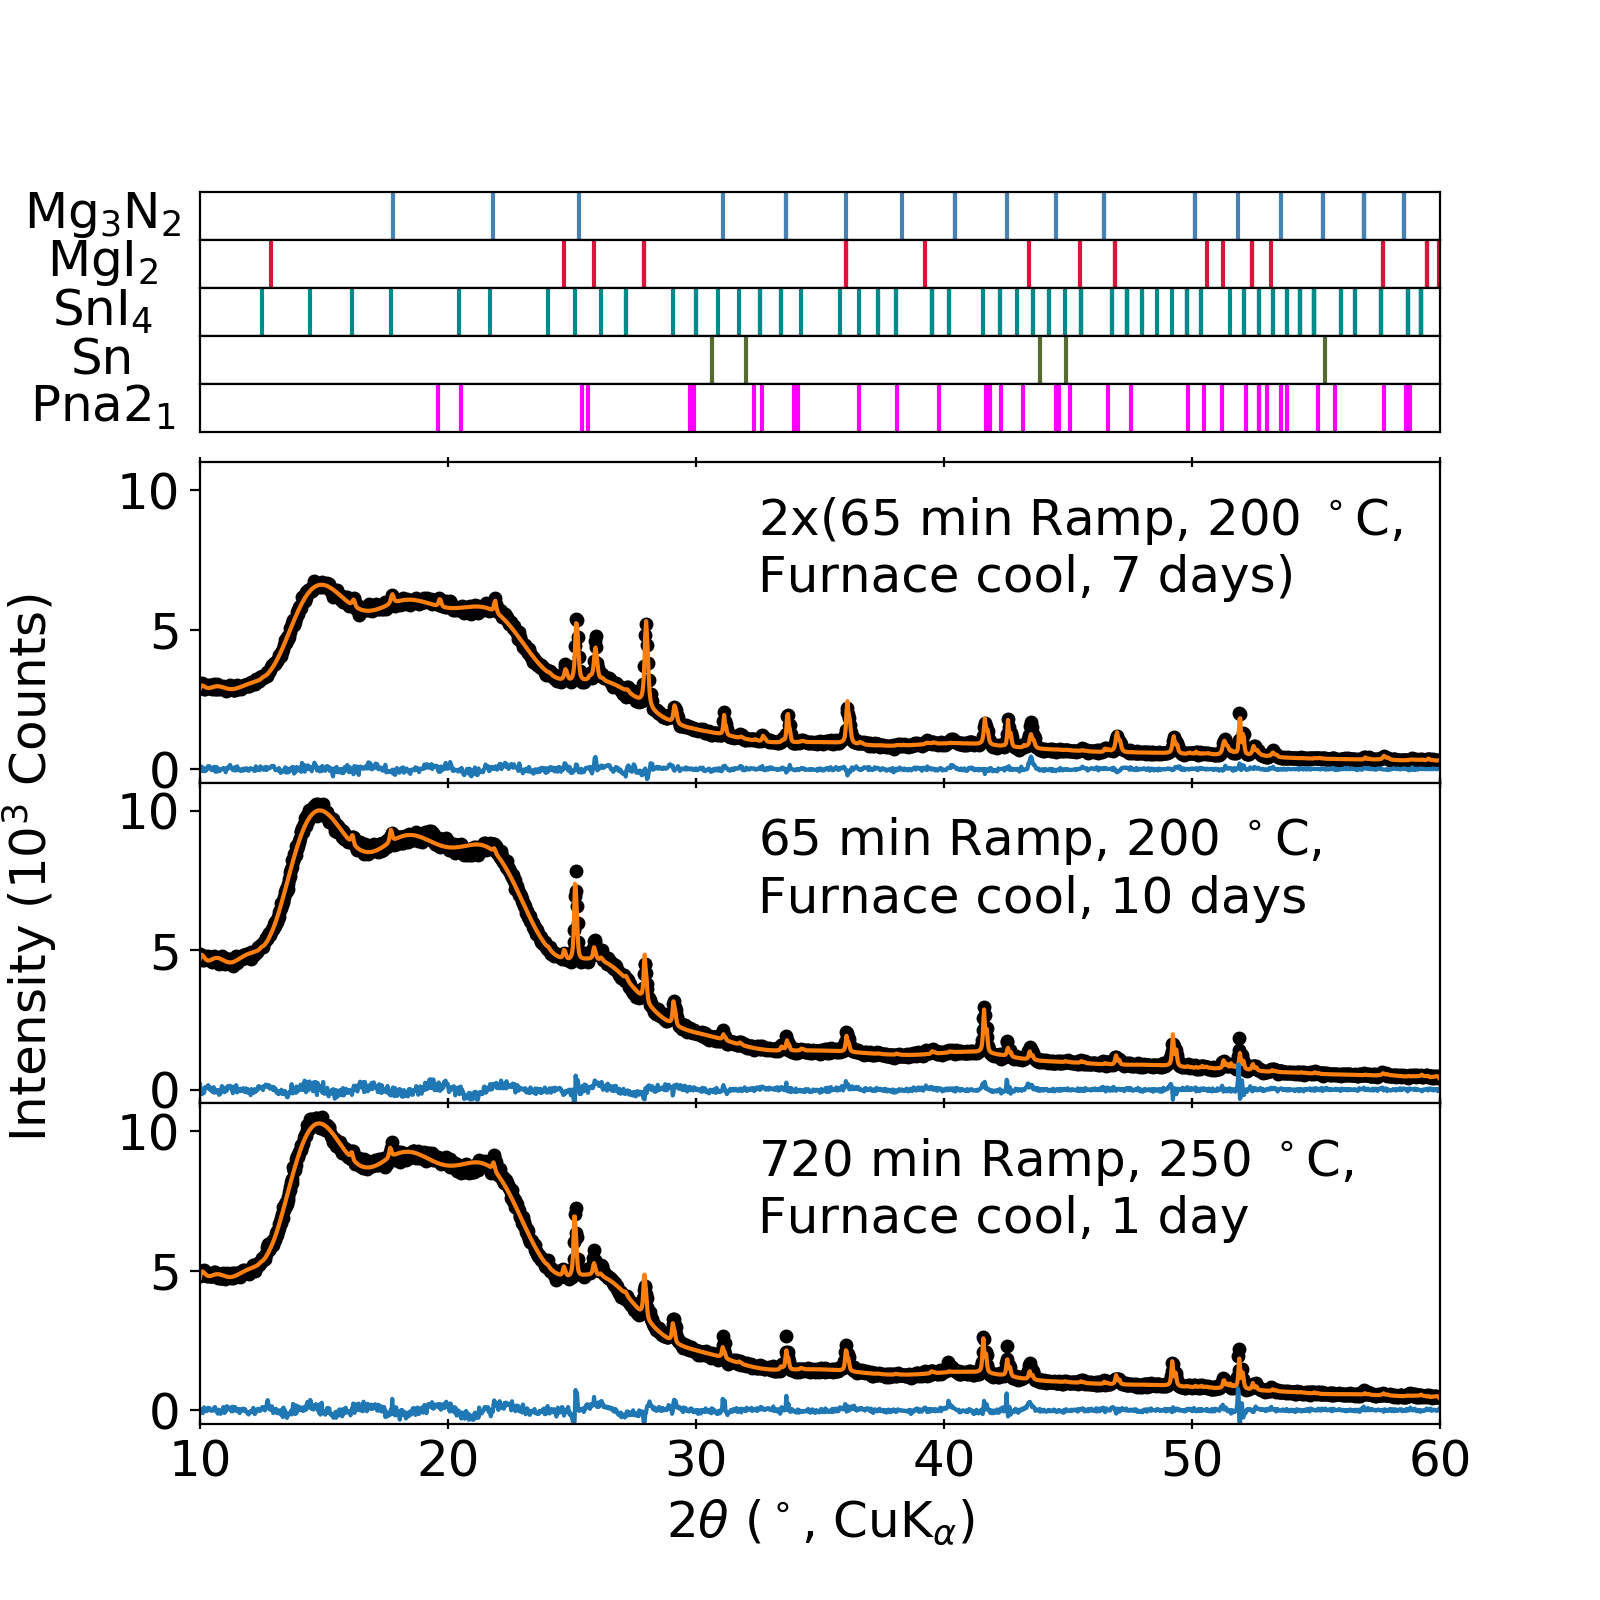

In [4]:
#Plot all scans
fig = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[len(hklTicks), 20]) 
gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 
#fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(8, 8))  # to make a new figure

#x-axis focus two theta range
xmin = 10
xmax = 60

ymin = -0.5
ymax = 11

#OPTIONAL Modifications
dataColor = 'k' #black
fitColor = 'tab:orange'
diffColor = 'tab:blue'

inner_grid = gridspec.GridSpecFromSubplotSpec(len(hklTicks), 1,
                subplot_spec=gs[0], hspace = 0, wspace=0.0) #, hspace=1)
# #HKL ticks, top box(es)
for i in range(len(hklTicks)):
    ax0 = plt.subplot(inner_grid[i]) #make a subplot on row "i" in the inner grid
    #Plot list of data points to make lines thicker, as opposed to using "|" ticks
    for tick in hklTicks[i]: 
        ax0.plot((tick, tick), (0,1), 
         color = colorlist[i], linestyle = '-', linewidth = 1.5, label = hklNames[i])
    #Turn off all gridlines, tick labels.
    ax0.set_xticklabels([])
    ax0.tick_params(axis = 'x', direction = 'in', top = False, bottom = False)
    ax0.tick_params(axis = 'y', left = False, right = False, labelleft = False, labelright = False)
    # Make sure axes match. 
    ax0.set_xlim(xmin, xmax)
#TODO find a way to set the y-axis ticks as the phase name, to ensure better alignment
    ax0.set_ylabel(hklNames[i], rotation = 0, labelpad = 35, y=0) #y=-0.2 to align vertically with box
# ax0.text(0, 1, 'hkl', fontsize= allSized)
#data and fit, central box
# ax1 = plt.subplot(gs[1])
# ax1.set_xlim(xmin, xmax)
# ax1.set_ylim(ymin, ymax)
offset = 0
bump = 1000
diffOff = 0
i = 0

inner_grid2 = gridspec.GridSpecFromSubplotSpec(len(dictionary), 1,
                subplot_spec=gs[1], wspace=0.0, hspace=0)

labels = ['2x(65 min Ramp, 200 $^\circ$C,\nFurnace cool, 7 days)',
         '65 min Ramp, 200 $^\circ$C,\nFurnace cool, 10 days',
         '720 min Ramp, 250 $^\circ$C,\nFurnace cool, 1 day']
for key in dictionary:
    ax1 = plt.subplot(inner_grid2[i])
#     print(key)
    d = dictionary[key]
#     print(d)
    t = d[0]
    data = d[1]
    fit = d[3]
    diff = d[2]
    ax1.plot(t,data/1000, color = dataColor, marker = 'o', lineStyle ='None', label = key, markersize = 4)
    ax1.plot(t,fit/1000, color = fitColor)#, label = 'Fit')
    ax1.plot(t,diff/1000, color = diffColor)#, label = 'Difference')
    ax1.tick_params(axis = 'x', 
                    direction = 'inout',
                   bottom = True, top = True)
    ax1.text(0.45*(xmax-xmin)+xmin, 0.6*(ymax-ymin)+ymin, labels[i])
    ax1.set_ylim(ymin, ymax)


#     ax1.legend()
#     ax1.set_yscale('log')
    if i == len(dataFiles)-1:
        ax1.set_xlabel('$2\\theta$ ($^\circ$, CuK$_{\\alpha}$)')
    else:
        ax1.set_xticklabels([])
# ax1.tick_params(direction = 'in', top = True, bottom = True, right = True)
# ax1.legend(loc = legLoc, frameon = False, bbox_transform=plt.gcf().transFigure)
    ax1.set_xlim(xmin, xmax)
    i +=1

fig.text(-0.0, 0.6, s = 'Intensity (10$^3$ Counts)', rotation = 'vertical')


# ax1.set_xticklabels(range(5,9,1))



# #difference curve, bottom box
# ax2 = plt.subplot(gs[2])
# ax2.set_xlim(xmin, xmax)
# ax2.plot(t,diff, 'navy', label = "Difference")
# ax2.set_xlabel('$2\Theta$ ($^\circ$, Cu$_{k\\alpha}$)')
# ax2.tick_params(direction = 'in', top = True, bottom = True, right = True)
# ax2.legend(loc = legLoc, frameon = False)

#Outputs a title that can easily be cropped out in powerpoint/keynote,
#but helps ensure one doesn't mismatch data accidentally
# fig.suptitle('Sequential Refinements 400$^\circ$C')
# print('done')
# plt.tight_layout()
plt.show()

## Run the code below to save the figure

In [6]:
#Save the figure
saveLocation = path.join(saveIn,saveFigAs)

plt.savefig(saveLocation, dpi = 300, facecolor = 'white')

NameError: name 'saveIn' is not defined